In [221]:
import pandas as pd
import ppscore as pps
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

In [222]:
df = pd.read_csv('train.csv',index_col='Unnamed: 0')
test = pd.read_csv('test.csv')

In [223]:
df.shape

(13730, 166)

In [224]:
test.shape

(4570, 43)

In [225]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [226]:
# Descartando as features que não estão presentes no teste. Exceto a target, claro

features = list(test.columns)
features.append('IN_TREINEIRO')
df = df[features]

In [227]:
inscricao_train = df['NU_INSCRICAO']
df.drop('NU_INSCRICAO',1,inplace=True)

inscricao_test = test['NU_INSCRICAO']
test.drop('NU_INSCRICAO',1,inplace=True)

In [228]:
df['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [229]:
df.isnull().sum().sort_values(ascending=False)[:20]

TP_DEPENDENCIA_ADM_ESC    9448
TP_ENSINO                 9448
Q027                      7373
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_LC                3597
NU_NOTA_REDACAO           3597
NU_NOTA_COMP5             3597
NU_NOTA_COMP4             3597
NU_NOTA_CN                3389
NU_NOTA_CH                3389
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
TP_ESCOLA                    0
IN_TREINEIRO                 0
TP_ANO_CONCLUIU              0
IN_DISCALCULIA               0
dtype: int64

In [230]:
test.isnull().sum().sort_values(ascending=False)[:20]

TP_DEPENDENCIA_ADM_ESC    3144
TP_ENSINO                 3144
Q027                      2437
NU_NOTA_COMP1             1170
NU_NOTA_LC                1170
NU_NOTA_REDACAO           1170
NU_NOTA_COMP5             1170
NU_NOTA_COMP4             1170
NU_NOTA_COMP3             1170
NU_NOTA_COMP2             1170
TP_STATUS_REDACAO         1170
NU_NOTA_CN                1112
NU_NOTA_CH                1112
IN_CEGUEIRA                  0
IN_BAIXA_VISAO               0
TP_ESCOLA                    0
Q047                         0
TP_ANO_CONCLUIU              0
IN_DISLEXIA                  0
TP_ST_CONCLUSAO              0
dtype: int64

### Tratamento de valores missing
Muitas vezes o NaN é informação também, então não serão dropadas features com valores nulos neste caso

In [231]:
df['Q027'].value_counts()

F    1267
D    1247
C     751
E     730
B     699
A     475
G     435
H     275
I     141
M     128
J      94
K      68
L      47
Name: Q027, dtype: int64

In [232]:
df['Q027'].fillna('nulo',inplace=True)
test['Q027'].fillna('nulo',inplace=True)

In [233]:
df['TP_ENSINO'].value_counts()

1.0    3886
3.0     370
2.0      26
Name: TP_ENSINO, dtype: int64

In [234]:
df['TP_ENSINO'].fillna(-1,inplace=True)
test['TP_ENSINO'].fillna(-1,inplace=True)

In [235]:
df['TP_DEPENDENCIA_ADM_ESC'].value_counts()

2.0    3611
4.0     569
1.0      64
3.0      38
Name: TP_DEPENDENCIA_ADM_ESC, dtype: int64

In [236]:
df['TP_DEPENDENCIA_ADM_ESC'].fillna(-1,inplace=True)
test['TP_DEPENDENCIA_ADM_ESC'].fillna(-1,inplace=True)

In [237]:
df.fillna(0,inplace=True)
test.fillna(0,inplace=True)

### Predictive Power Score (pps)
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

In [238]:
imb_pps = pps.matrix(df)

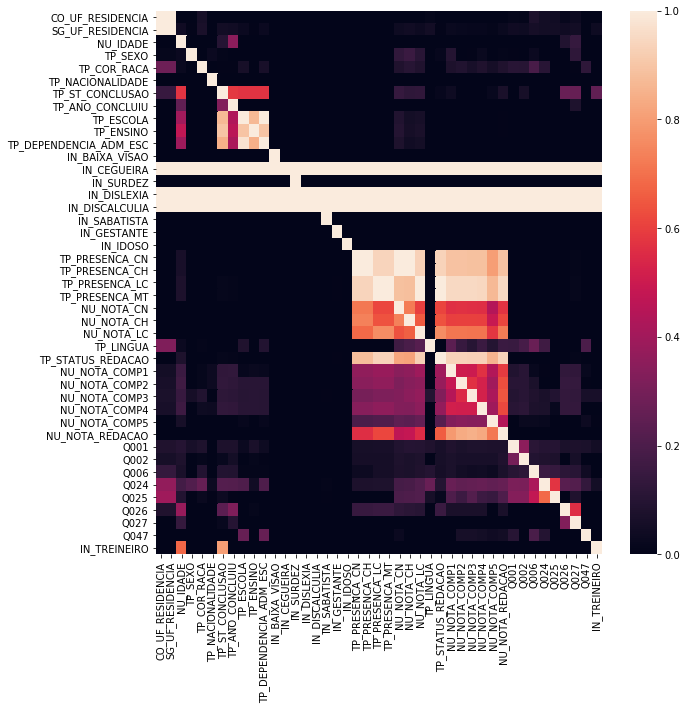

In [239]:
plt.figure(figsize=(10,10))
sns.heatmap(imb_pps)
plt.show()

In [240]:
# ordem decrescende dos PPS relaconados ao IN_TREINEIRO

imb_pps.iloc[-1].sort_values(ascending=False)

IN_TREINEIRO              1.000000e+00
TP_ST_CONCLUSAO           8.029189e-01
NU_IDADE                  6.806053e-01
IN_BAIXA_VISAO            2.618778e-07
IN_IDOSO                  2.618778e-07
IN_GESTANTE               2.618778e-07
IN_SABATISTA              2.618778e-07
IN_DISCALCULIA            2.618778e-07
IN_DISLEXIA               2.618778e-07
IN_SURDEZ                 2.618778e-07
IN_CEGUEIRA               2.618778e-07
TP_ENSINO                 2.618778e-07
TP_DEPENDENCIA_ADM_ESC    2.618778e-07
TP_PRESENCA_CH            2.618778e-07
TP_ESCOLA                 2.618778e-07
TP_ANO_CONCLUIU           2.618778e-07
TP_NACIONALIDADE          2.618778e-07
TP_COR_RACA               2.618778e-07
TP_SEXO                   2.618778e-07
SG_UF_RESIDENCIA          2.618778e-07
TP_PRESENCA_CN            2.618778e-07
TP_PRESENCA_LC            2.618778e-07
Q047                      2.618778e-07
NU_NOTA_COMP5             2.618778e-07
Q027                      2.618778e-07
Q026                     

### Correlação
Também será calculada a correlação, para depois comparar com o PPS no final

In [241]:
imb_corr = df.corr()

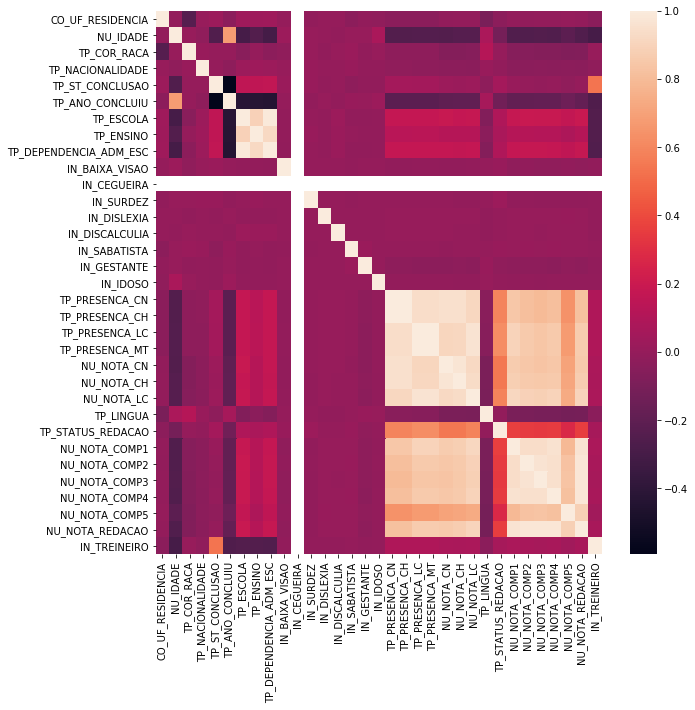

In [242]:
plt.figure(figsize=(10,10))
sns.heatmap(imb_corr)
plt.show()

In [243]:
imb_corr['IN_TREINEIRO'].sort_values(ascending=False)

IN_TREINEIRO              1.000000
TP_ST_CONCLUSAO           0.533983
TP_PRESENCA_CN            0.094692
TP_PRESENCA_CH            0.094692
TP_PRESENCA_LC            0.092454
TP_PRESENCA_MT            0.092454
NU_NOTA_LC                0.083731
NU_NOTA_CN                0.080915
NU_NOTA_COMP1             0.080326
NU_NOTA_CH                0.078276
NU_NOTA_COMP2             0.069545
NU_NOTA_REDACAO           0.069119
NU_NOTA_COMP4             0.068862
NU_NOTA_COMP3             0.064340
TP_STATUS_REDACAO         0.063190
NU_NOTA_COMP5             0.045809
TP_COR_RACA               0.009676
IN_SABATISTA              0.003824
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_IDOSO                 -0.004663
IN_SURDEZ                -0.007374
IN_GESTANTE              -0.011893
IN_BAIXA_VISAO           -0.013602
TP_NACIONALIDADE         -0.015179
CO_UF_RESIDENCIA         -0.034944
TP_LINGUA                -0.036395
TP_ESCOLA                -0.244562
TP_ENSINO           

### One-hot encoding (get dummies)

In [244]:
# one hot encoding

treineiro = df['IN_TREINEIRO']
df.drop('IN_TREINEIRO',1,inplace=True)

dummies = pd.get_dummies(df.append(test))

# "Devolvendo" os dataframes para df e test
df_lenght = len(df)

df = dummies.iloc[:df_lenght]
test = dummies.iloc[df_lenght:]

df['IN_TREINEIRO'] = treineiro

# Poupando um pouco de memória
del dummies

### Dividindo treino e teste

In [245]:
X = df.drop('IN_TREINEIRO',1)
y = df['IN_TREINEIRO']

Xtrain, Xval, ytrain, yval  = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### SMOTETomek para tratamento de classe desbalanceada
Esta técnica combina under e over sampling, aplicando SMOTE e depois Tomek Links. 
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html

In [258]:
smt = SMOTETomek(random_state=42)
Xres, yres = smt.fit_resample(Xtrain, ytrain)

In [259]:
Xres.shape

(15942, 123)

In [260]:
yres.shape

(15942,)

### Predição

In [261]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(Xres,yres)

pred = rf.predict(Xval)
proba = rf.predict_proba(Xval)

### Classification report e confusion matrix

In [250]:
print(classification_report(yval, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3928
           1       0.99      0.98      0.98       603

    accuracy                           1.00      4531
   macro avg       0.99      0.99      0.99      4531
weighted avg       1.00      1.00      1.00      4531



In [251]:
confusion_matrix(yval, pred)

array([[3923,    5],
       [  13,  590]], dtype=int64)

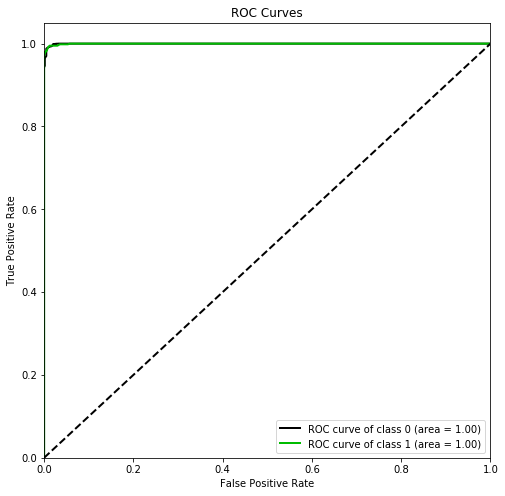

In [252]:
skplt.metrics.plot_roc_curve(yval, proba, figsize=(8,8), curves='each_class')
plt.show()

### Feature importance
Aqui podemos ver que as 2 features com maior importância foram as 2 com maior PPS. Também é possível perceber que a feature NaN da Q027 tem importância significante na predição, evidenciando que nem sempre dropar é o caminho certo.

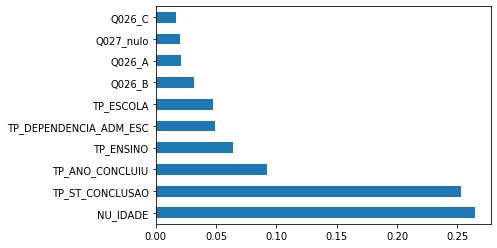

In [253]:
feat_importances = pd.Series(rf.feature_importances_, index= X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Submit

In [254]:
smt = SMOTETomek(random_state=42)
Xres, yres = smt.fit_resample(X, y)

rf.fit(Xres,yres)
sub = rf.predict(test)

In [255]:
submit = pd.Series(sub, index=inscricao_test, name='IN_TREINEIRO')

In [256]:
submit.to_csv("answer.csv", header=True)

In [257]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
